# Q1) Solve x = $e^{-x}$ 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

F = lambda x : np.exp(-x)

def fp(n,t,init):
    X = np.zeros(n)
    X[0] = init
    for i in range(n):
        if i == n-1:
            print("Maximum Iterations Exceeded")
            break
        
        X[i+1] = F(X[i])

        if abs(X[i+1]-X[i])>t:
            continue
        
        else:
           # break
            return X[i+1]
        
print("The Solution for the equation is x =",round(fp(1000,0.00001,1),4))

The Solution for the equation is x = 0.5671


# Q2) Integrating $\int_0^1\sqrt{1+x^4}$ dx

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

F = lambda x : (1+x**4)**0.5

#Simpson's Rule Solution

def simpson(a,b,n): #a=lower limit, b=upper limit, n=number of intervals
    h = (b-a)/n
    x = list()
    fx = list()

    i = 0           # Finding values of x and f(x) where f(x) is the integrand and appending it to a list
    while i<= n:
        x.append(a + i * h)
        fx.append(F(x[i]))
        i += 1


    res = 0
    i = 0
    while i<= n:
        if i == 0 or i == n:
            res+= fx[i]
        elif i % 2 != 0:
            res+= 4 * fx[i]
        else:
            res+= 2 * fx[i]
        i+= 1
    res = res * (h / 3)
    return res
    
print("Using Simpson's Method, I =", round(simpson(0,1,100),6))


#Guassian Quadrature

# Nodes and weights for 5-point quadrature
nodes = np.array([-0.906179845938664, -0.538469310105683, 0, 0.538469310105683, 0.906179845938664])
weights = np.array([0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189])

a = 0
b = 1

gauss = np.sum(weights * F((b-a)/2 * nodes + (a+b)/2)) * (b - a) / 2

print("Using Gaussian Quadrature, I =", round(gauss,6))

Using Simpson's Method, I = 1.089429
Using Gaussian Quadrature, I = 1.08943


# Q3.) Solving ODE using RK4

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

ydash = lambda x, y: (5*x**2 - y)/(np.exp(x+y))

def RK4(x0, y0, x, h):
    n = int((x - x0) / h) # Number of iterations based on step size 
    
    table = [(x0, y0)]
    
    y = y0
    for i in range(1, n + 1):
        k1 = h * ydash(x0, y)
        k2 = h * ydash(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * ydash(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * ydash(x0 + h, y + k3)

        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        x0 = x0 + h
        
        table.append((x0, y))
    return table


print("For h = 0.5")
x0 = 0
y = 1
x = 2
h = 0.5
table = RK4(x0, y, x, h)
func = pd.DataFrame(table, columns=['x', 'y'])
print(func)


print("For h = 0.2")
x0 = 0
y = 1
x = 2
h = 0.2
table = RK4(x0, y, x, h)
func = pd.DataFrame(table, columns=['x', 'y'])
print(func)


print("For h = 0.05")
x0 = 0
y = 1
x = 2
h = 0.05
table= RK4(x0, y, x, h)
func = pd.DataFrame(table, columns=['x', 'y'])
print(func)


print("For h = 0.01")
x0 = 0
y = 1
x = 2
h = 0.01
table = RK4(x0, y, x, h)
func = pd.DataFrame(table, columns=['x', 'y'])
print(func)

For h = 0.5
     x         y
0  0.0  1.000000
1  0.5  0.913193
2  1.0  1.071926
3  1.5  1.349783
4  2.0  1.619126
For h = 0.2
      x         y
0   0.0  1.000000
1   0.2  0.937797
2   0.4  0.910445
3   0.6  0.926711
4   0.8  0.983812
5   1.0  1.071586
6   1.2  1.177827
7   1.4  1.291957
8   1.6  1.406358
9   1.8  1.516227
10  2.0  1.618896
For h = 0.05
       x         y
0   0.00  1.000000
1   0.05  0.982134
2   0.10  0.965583
3   0.15  0.950700
4   0.20  0.937796
5   0.25  0.927131
6   0.30  0.918918
7   0.35  0.913318
8   0.40  0.910442
9   0.45  0.910352
10  0.50  0.913060
11  0.55  0.918535
12  0.60  0.926706
13  0.65  0.937466
14  0.70  0.950679
15  0.75  0.966185
16  0.80  0.983805
17  0.85  1.003352
18  0.90  1.024628
19  0.95  1.047435
20  1.00  1.071578
21  1.05  1.096866
22  1.10  1.123115
23  1.15  1.150154
24  1.20  1.177820
25  1.25  1.205963
26  1.30  1.234447
27  1.35  1.263147
28  1.40  1.291950
29  1.45  1.320756
30  1.50  1.349476
31  1.55  1.378031
32  1.60  1.406352

# Q4) Solving 1D Heat Equation

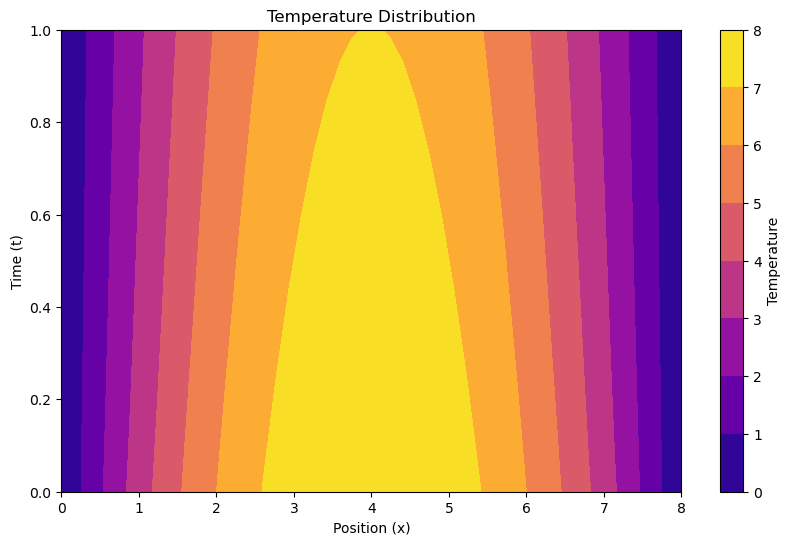

      0.00      0.16      0.33      0.49      0.65      0.82      0.98  \
0.00   0.0  0.639733  1.252811  1.839234  2.399000  2.932112  3.438567   
0.01   0.0  0.655693  1.246421  1.829736  2.389070  2.922121  3.428569   
0.02   0.0  0.662184  1.244170  1.821572  2.379431  2.912186  3.418580   
0.03   0.0  0.664744  1.242338  1.814747  2.370316  2.902393  3.408623   
0.04   0.0  0.665425  1.240191  1.808695  2.361777  2.892828  3.398735   
...    ...       ...       ...       ...       ...       ...       ...   
0.96   0.0  0.541259  1.005935  1.465519  1.917729  2.360375  2.791374   
0.97   0.0  0.540229  1.004029  1.462759  1.914149  2.356015  2.786283   
0.98   0.0  0.539204  1.002131  1.460011  1.910584  2.351673  2.781212   
0.99   0.0  0.538183  1.000242  1.457276  1.907034  2.347349  2.776161   
1.00   0.0  0.537167  0.998361  1.454552  1.903499  2.343042  2.771130   

          1.14      1.31      1.47  ...      6.53      6.69      6.86  \
0.00  3.918367  4.371512  4.798001  ..

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

L = 8.0  # Length 
T = 1.0  # Final timer
Nx = 50  # Number of spatial grid points
Nt = 100  # Number of time steps
alpha = 1  # Thermal diffusivity

dx = L / (Nx - 1)
x = np.linspace(0, L, Nx)

dt = T / Nt 
t = np.linspace(0, T, Nt)

r = alpha * dt / (2 * dx**2)

u0 = 4 * x - x**2 / 2

A = np.diag(-r * np.ones(Nx-1), -1) + \
    np.diag((1 + 2*r) * np.ones(Nx)) + \
    np.diag(-r * np.ones(Nx-1), 1)

B = np.diag(r * np.ones(Nx-1), -1) + \
    np.diag((1 - 2*r) * np.ones(Nx)) + \
    np.diag(r * np.ones(Nx-1), 1)

# Implementing Crank-Nicolson method
u = np.zeros((Nt, Nx))
u[0, :] = u0
for i in range(1, Nt):
    b = np.dot(B, u[i-1])
    u[i] = np.linalg.solve(A, b)
    # Boundary conditions
    u[i, 0] = 0
    u[i, -1] = 0

X, T = np.meshgrid(x, t)
plt.figure(figsize=(10, 6))
plt.contourf(X, T, u, cmap='plasma')
plt.colorbar(label='Temperature')
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Temperature Distribution')
plt.show()

df = pd.DataFrame(u, index=np.around(t, decimals=2), columns=np.around(x, decimals=2))
print(df)

# Q5) Solving 2D Poisson's Equation

Table:
     0.0       0.4       0.8       1.2       1.6  2.0
0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.0
0.2  0.0 -0.132767 -0.210413 -0.230460 -0.173466  0.0
0.4  0.0 -0.242490 -0.382954 -0.421348 -0.320972  0.0
0.6  0.0 -0.297902 -0.466617 -0.517779 -0.404204  0.0
0.8  0.0 -0.247996 -0.381405 -0.429102 -0.350761  0.0
1.0  0.0  0.000000  0.000000  0.000000  0.000000  0.0


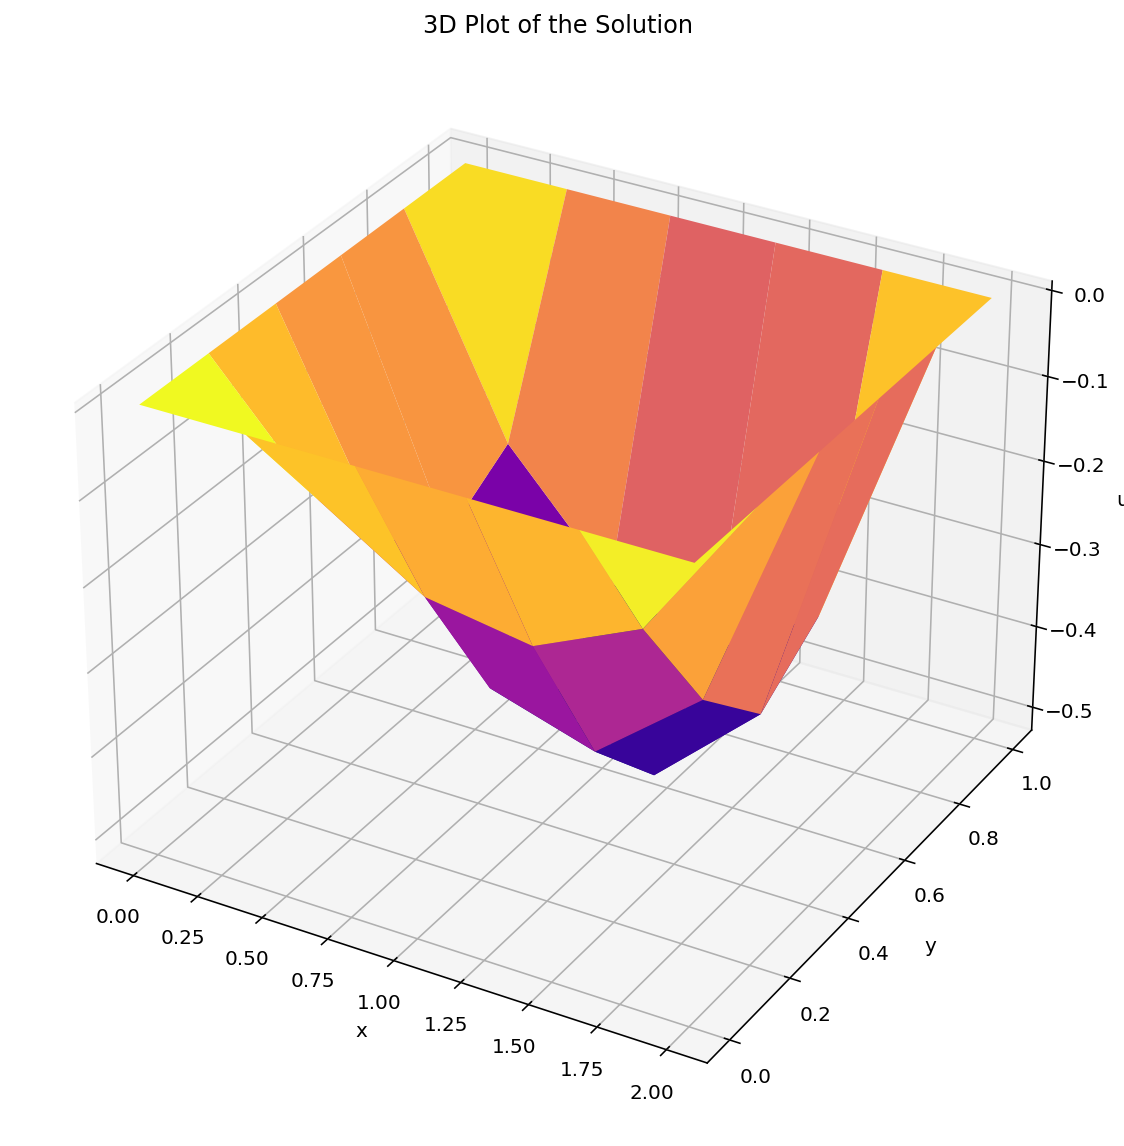

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

N = 6  #Number of Grid Points
dx = 2 / (N - 1)
dy = 1 / (N - 1)

x = np.linspace(0, 2, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

def f(x, y):
    return x * np.exp(y)

u_top = 2 * np.exp(y) #Boundary conditions
u_bottom = x
u_left = np.zeros(N)
u_right = 2 * np.exp(y)

u = np.zeros((N, N)) #Initial guess

#Finite Difference iteration
max_iter = 1000
tolerance = 1e-6
for _ in range(max_iter):
    u_old = u.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            u[i, j] = (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1] - dx**2 * f(x[i], y[j])) / 4
    if np.allclose(u, u_old, atol=tolerance):
        break

df = pd.DataFrame(u, index=np.round(y, 2), columns=np.round(x, 2))
print("Table:")
print(df)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='plasma')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('3D Plot')
plt.show()